## 图像分类数据集

使用类似MINIST但更复杂的Fashion-MNIST数据集

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt

### 1.读取数据集

框架内置函数讲Fashion-MINIST数据下载并读取到内存中

In [2]:
# 通过ToTensor，将图像数据从PIL类型变成32位浮点数
# 除以255，使得所有像素的数值都在0-1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True, transform=trans, download=True)     # 读成了torch.data.dataset
mnist_test = torchvision.datasets.FashionMNIST(root='../data', train=False, transform=trans, download=True)
len(mnist_train), len(mnist_test)

(60000, 10000)

每个输入图像的高度和宽度均为28像素。 数据集由灰度图像组成，其通道数为1。

In [3]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

获取标签，可视化数据集

In [4]:
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

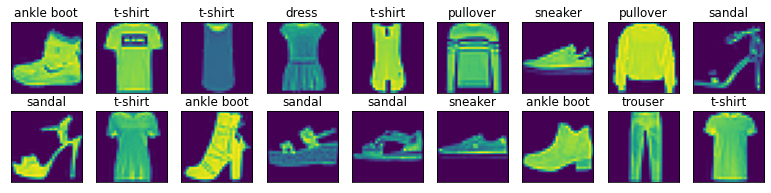

In [5]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

torchvision.io.read_image()读取出的图片格式，形如：（通道c，高y，宽x）

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

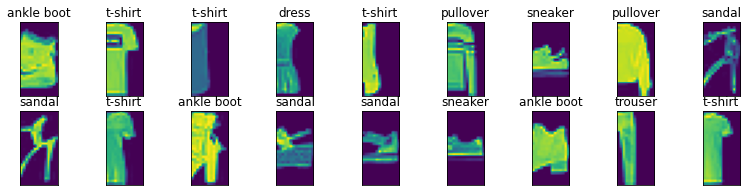

In [6]:
show_images(X.reshape(18, 28, 28)[:, :, 14:], 2, 9, titles=get_fashion_mnist_labels(y))

### 2.读取小批量

In [9]:
import sys
sys.path.append('..')
import utils

batch_size = 256
dataloader_workers = 4
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=dataloader_workers)

timer = utils.Timer()
for X, y in train_iter:
    continue
print(f'{timer.stop():.2f} sec')

1.66 sec


训练时需要确定，读取数据不是性能瓶颈

### 3.整合

In [10]:
def load_data_fashion_mnist(batch_size:int, root:str, dataloader_workers:int =4, resize=None):  #@save
    """
    下载Fashion-MNIST数据集，然后将其加载到内存中
    ### Parameters:
    - batch_size: 批量的大小
    - root: 下载后存放数据集的位置
    - dataloader_workers: 取batch的线程数
    - resize: 如果需要transforms.Resize操作，则传入resize后的大小；比如想要将28*28的转变为64*64，则指定resize=64
    """
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root=root, train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root=root, train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=dataloader_workers),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=dataloader_workers))

In [11]:
train_iter, test_iter = load_data_fashion_mnist(32, '../data', resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


### 4.小结

- Fashion-MNIST是一个服装分类数据集，由10个类别的图像组成。我们将在后续章节中使用此数据集来评估各种分类算法。
- 数据迭代器是获得更高性能的关键组件。依靠实现良好的数据迭代器，利用高性能计算来避免减慢训练过程。

### 5.练习

- 如何改进数据迭代器的性能？
- batch_size对迭代速度的影响？

In [ ]:
# todo: 写一个可视化batch_size对遍历时间的影响